## Housing Price Analysis

Here we will analyzing differenct factors that might effect the sale price of a Home. From these insights we will be able to recommend mortgatage loans we should invest in. 

In [0]:
# importing the libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

In [0]:
df = pd.read_csv('housing-price-data-04042019.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


There are 19 coulmns out of 81 with missing values in the data set
Percentage of misisng values from columns
 PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64


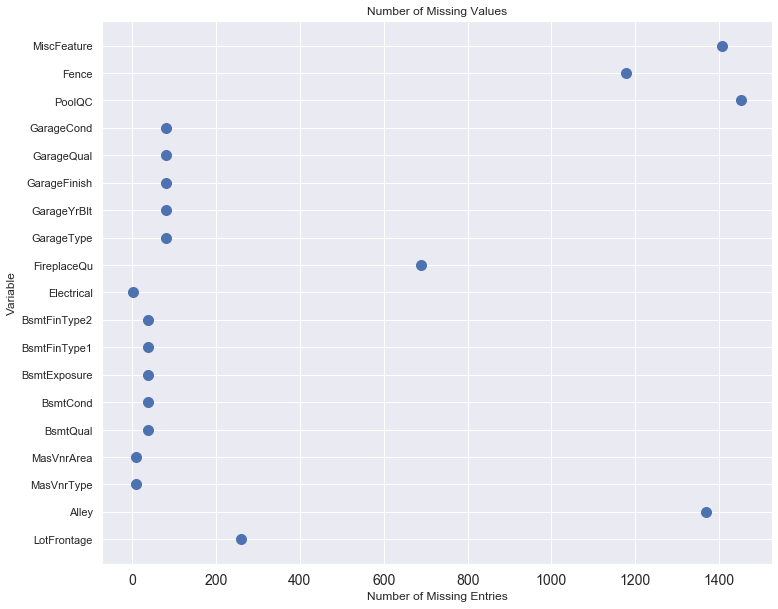

In [0]:
# cleaning the data and saving to csv file 
# finding missing data

cols_missing = df.columns[df.isnull().any()].values
print('There are {} coulmns out of {} with missing values in the data set'.format(cols_missing.shape[0], df.shape[1]))

# we can visualize the missing data and also calculate percentages to impute best way to impute or omit the missing data
num_missing_values = len(df) - df.loc[:, df.isnull().sum()>0].count()
percent_missing = ((num_missing_values/df.shape[0])*100).sort_values(ascending=False)
print('Percentage of misisng values from columns\n',percent_missing)


x = num_missing_values.index
y = num_missing_values 

fig, ax = plt.subplots(figsize=(12,10))
plt.xticks(fontsize=14)
ax.scatter(y,x, s=100)
ax.set_title('Number of Missing Values')
ax.set_ylabel('Variable')
ax.set_xlabel('Number of Missing Entries')
fig.savefig('images/Missing Values.png')

# x = percent_missing.index
# y = percent_missing

# fig, ax2 = plt.subplots(figsize=(14,16))
# plt.xticks(fontsize=14)
# ax2.scatter(y,x, s=100, color='green')
# ax2.set_title('Number of Missing Values')
# ax2.set_ylabel('Variable')
# ax2.set_xlabel('Number of Missing Entries')

### Imputing for missing values 

When looking at missing values we usually drop cols with large ammounts 
of missing data, however from data description we can treat many columns 
as 0 or none instead of NaN.

For categorical columns we will impute the mode, and for discrete or contiunous numerical values we will impute by thier means.


In [0]:
''' looking at missing values we usually drop cols with large ammounts 
of missing data, however from data description we can treat many columns 
as 0 or none instead of NaN. '''

none_cols = df[['PoolQC','MiscFeature','Alley', 'Fence', 'FireplaceQu', 
                    'GarageType', 'GarageCond','GarageFinish','GarageQual',
                    'BsmtFinType2','BsmtExposure','BsmtQual','BsmtCond','BsmtFinType1','MasVnrType']]

mode_cols = df[['Electrical', 'MSZoning','Utilities','Exterior1st',
                    'Exterior2nd','KitchenQual','Functional', 'SaleType']]

median_cols = df[['BsmtFullBath','LotFrontage', 'BsmtHalfBath', 'GarageCars', 'MasVnrArea',
                      'GarageYrBlt', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageArea']]


# looping through each column and imputing missing values for each type 
for i in none_cols.columns:
    df[i].fillna('None', inplace=True)  # filling in None for missing 
    
for i in mode_cols.columns:
    df[i].fillna(df[i].mode()[0], inplace=True)
    
for i in median_cols.columns:
    df[i].fillna(df[i].median(), inplace=True)
    
cols_missing = df.columns[df.isnull().any()].values
print('There are {} coulmns out of {} with missing values in the data set'.format(cols_missing.shape[0], df.shape[1]))



There are 0 coulmns out of 81 with missing values in the data set


### Visualzations and EDA

To see if there is any correlation witht he variables and sales price we can  begin by first looking at a correlation heat map to see what corelates most to salesPrice and then do further investigation on those variables.

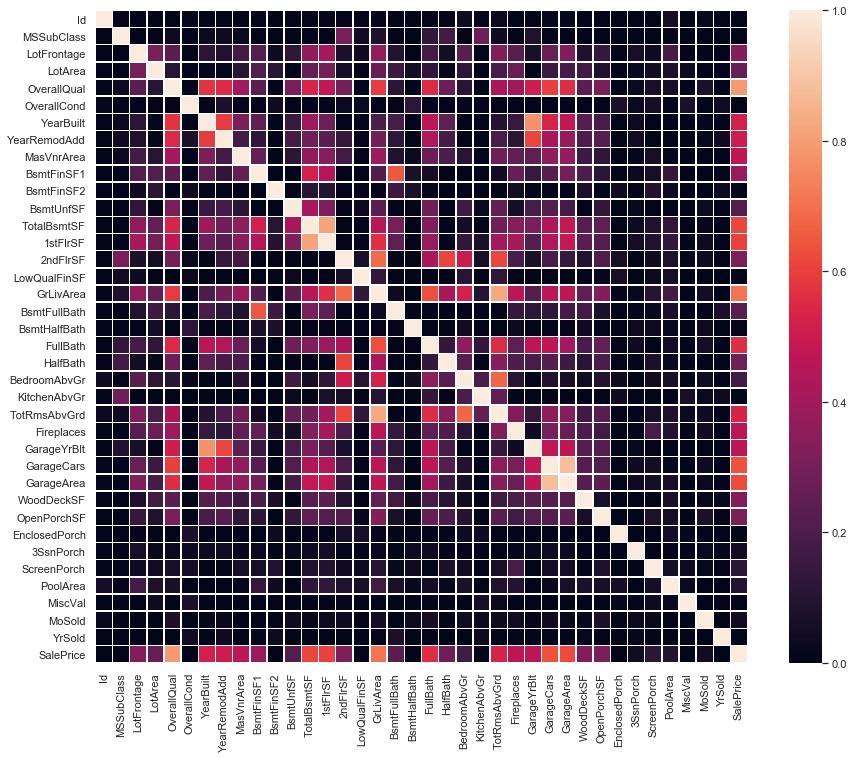

In [0]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(15,12))
sns.heatmap(corr, linewidths=.5, vmin=0, vmax=1, square=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
# ax.set_xlabel(corr.index, fontsize =10)
fig.savefig('images/Correlation.png')


In [0]:
corr

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.009921,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.051071,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.356718,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.009921,-0.356718,1.000000,0.304522,0.234812,-0.053281,0.116685,0.083348,0.178469,0.214367,...,0.075542,0.137014,0.010287,0.061945,0.037655,0.180819,-0.000255,0.010451,0.006380,0.334771
LotArea,-0.033226,-0.139781,0.304522,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.234812,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.053281,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.116685,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.083348,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.051071,0.023573,0.178469,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,...,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.472614
BsmtFinSF1,-0.005024,-0.069836,0.214367,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


From the above heat map we can see that SalesPrices seems to most correlate with variables like OverallQual, TotalBsmntSF, 1stFlrSF, GrLivArea, FulllBath, TotRmsAbvGr, GarageCars, GarageArea. Alot of these variables are obviously intercorrelated. 

"\n\n## note this join is not correct have to join category with numerical based off id before contiuning\n\n\n# joining categorical columns of interest to colums variable\ndf2 = cols.concat(df.select_dtypes(includes='object'))"

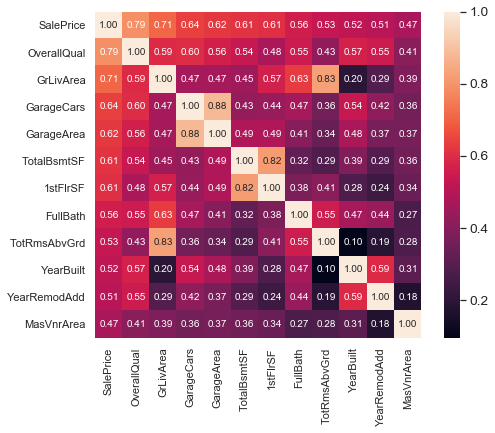

In [0]:
## we can make a more consise corr matrix based on sales price

k = 12 #number of variables for heatmap
cols = corr.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
fig, ax = plt.subplots(figsize=(8,6))
sns.set(font_scale=1.25)
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values, ax=ax)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.savefig('images/smaller_corr.png')
'''

## note this join is not correct have to join category with numerical based off id before contiuning


# joining categorical columns of interest to colums variable
df2 = cols.concat(df.select_dtypes(includes='object'))'''

In [0]:
cols.values
dfs = []
for i in cols.values:
   dfs.append(df[i])
decade_built = (df[['YearBuilt']]//10 * 10).rename(columns={'YearBuilt':'DecadeBuilt'}) 
print(decade_built.head())
correlated_df = pd.concat(dfs, axis =1)
correlated_df = pd.concat([correlated_df, decade_built, df[['Id']]], axis=1).set_index('Id')
correlated_df.to_csv('clean_data.csv', index=False)  # saving the clean data to new csv file. 
correlated_df.head()

   DecadeBuilt
0         2000
1         1970
2         2000
3         1910
4         2000


,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,MasVnrArea,DecadeBuilt
Id,,,,,,,,,,,,,
1,208500,7,1710,2,548,856,856,2,8,2003,2003,196.0,2000
2,181500,6,1262,2,460,1262,1262,2,6,1976,1976,0.0,1970
3,223500,7,1786,2,608,920,920,2,6,2001,2002,162.0,2000
4,140000,7,1717,3,642,756,961,1,7,1915,1970,0.0,1910
5,250000,8,2198,3,836,1145,1145,2,9,2000,2000,350.0,2000


In [0]:
correlated_df.shape

(1460, 13)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

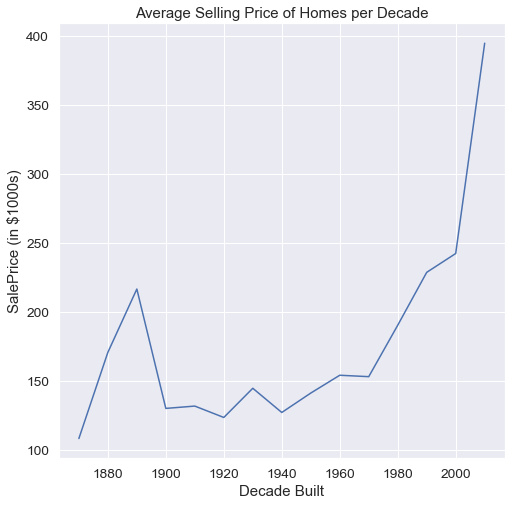

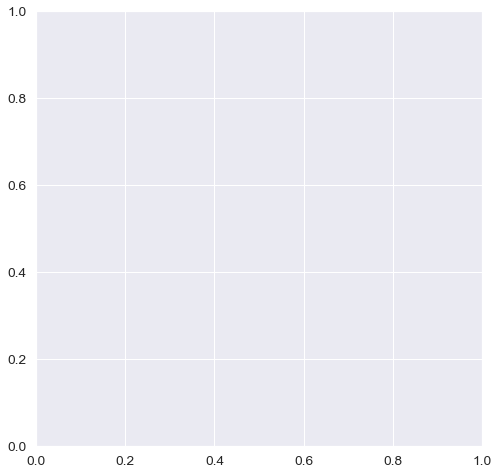

In [0]:
sales_by_decade = correlated_df.groupby('DecadeBuilt')['SalePrice'].mean().reset_index().sort_values(by='DecadeBuilt', ascending=True)
fig, ax =plt.subplots(figsize=(8,8))
plt.plot(sales_by_decade['DecadeBuilt'], sales_by_decade['SalePrice']/1000)
ax.set_xlabel('Decade Built')
ax.set_ylabel('SalePrice (in $1000s)')
ax.set_title('Average Selling Price of Homes per Decade')
fig.savefig('images/AvgHomePrice_decade.png')

fig, ax =plt.subplots(figsize=(8,8))
plt.boxplot(sales_by_decade['DecadeBuilt'], sales_by_decade['SalePrice'])
ax.set_xlabel('Decade Built')
ax.set_ylabel('SalePrice (in $1000s)')
ax.set_title('Average Selling Price of Homes per Decade')



From looking at heat map we see the top 10 correlations to Sale Pirce further observation show GarageCars and GarageArea are closesly correlated and logically that makes sense. large number cars more likely to have larger garage area so we can ommit it

Text(0, 0.5, 'Frequency of Price')

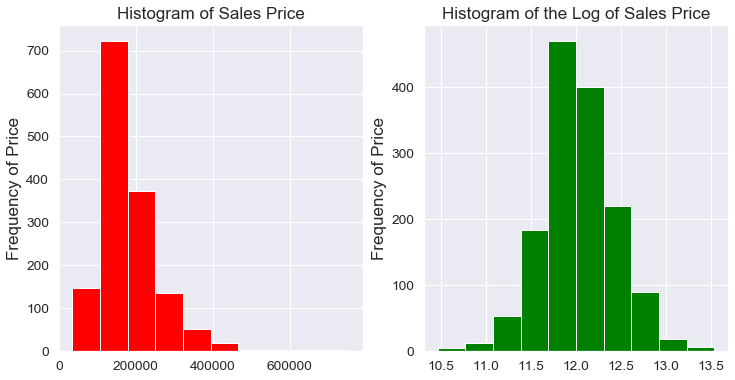

In [0]:
# visulazing the data
fig = plt.figure( figsize = (12,6))
plt.subplot(1,2,1)
plt.hist(df.SalePrice, color='red')
plt.title('Histogram of Sales Price', fontsize = 17)
plt.ylabel('Frequency of Price', fontsize = 17)

# hist of log of Sale Price
plt.subplot(1,2,2)
plt.hist(np.log(df.SalePrice), color='green')
plt.title('Histogram of the Log of Sales Price', fontsize = 17)
plt.ylabel('Frequency of Price', fontsize = 17)

In [0]:
# further observation of data to spot outliers

## From observing data taking the log of sales prics provides more normal distribution
def scatter_plot(x,y, Title, font_size, color):
        
    fig, ax= plt.subplots(figsize=(12,6))
    ax.scatter(x, y, c=color)
    ax.set_title(Title, fontsize = int(font_size))
    

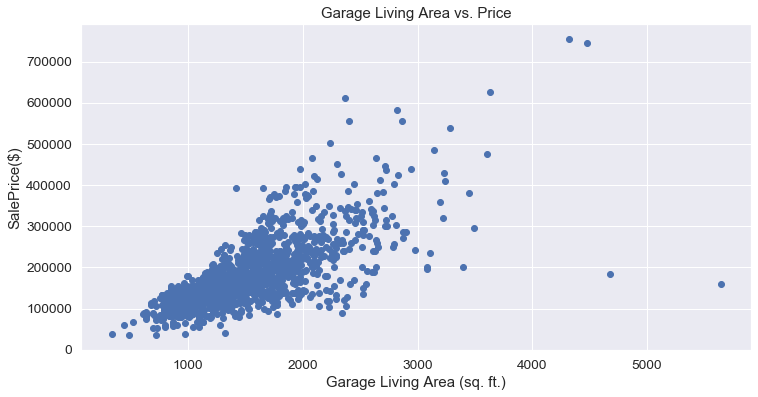

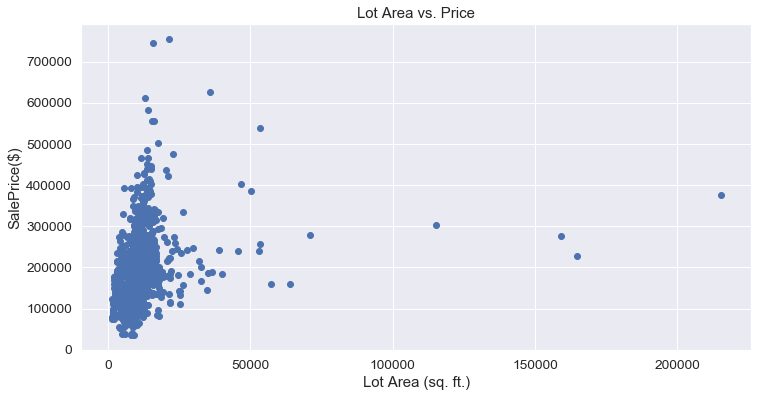

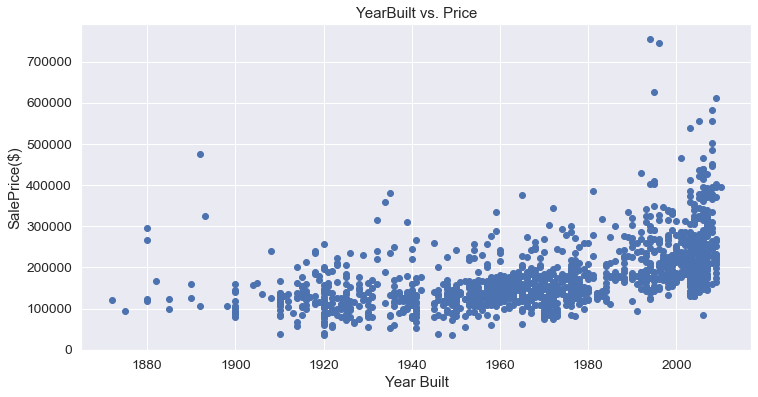

In [0]:
fig, ax= plt.subplots(figsize=(12,6))
ax.scatter(df['GrLivArea'], df['SalePrice'])
ax.set_title('Garage Living Area vs. Price', fontsize = 15)
ax.set_xlabel('Garage Living Area (sq. ft.)')
ax.set_ylabel('SalePrice($)')
fig.savefig('images/LivArea vs. SalePrice.png')


fig, ax= plt.subplots(figsize=(12,6))
ax.scatter(df['LotArea'], df['SalePrice'])
ax.set_title('Lot Area vs. Price', fontsize = 15)
ax.set_xlabel('Lot Area (sq. ft.)')
ax.set_ylabel('SalePrice($)')
fig.savefig('images/LotArea vs. SalePrice.png')

fig, ax= plt.subplots(figsize=(12,6))
ax.scatter(df['YearBuilt'], df['SalePrice'])
ax.set_title('YearBuilt vs. Price', fontsize = 15)
ax.set_xlabel('Year Built')
ax.set_ylabel('SalePrice($)')
fig.savefig('images/YearBuilt vs. SalePrice.png')




In [0]:
plt.bar(df[OverallQual], dfp[SalePrice])

NameError: name 'OverallQual' is not defined

['MSSubClass' 'MSZoning' 'LotFrontage' 'LotArea' 'Street' 'Alley'
 'LotShape' 'LandContour' 'Utilities' 'LotConfig' 'LandSlope'
 'Neighborhood' 'Condition1' 'Condition2' 'BldgType' 'HouseStyle'
 'OverallQual' 'OverallCond' 'YearBuilt' 'YearRemodAdd' 'RoofStyle'
 'RoofMatl' 'Exterior1st' 'Exterior2nd' 'MasVnrType' 'MasVnrArea'
 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond' 'BsmtExposure'
 'BsmtFinType1' 'BsmtFinSF1' 'BsmtFinType2' 'BsmtFinSF2' 'BsmtUnfSF'
 'TotalBsmtSF' 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' '1stFlrSF'
 '2ndFlrSF' 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath'
 'FullBath' 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'KitchenQual'
 'TotRmsAbvGrd' 'Functional' 'Fireplaces' 'FireplaceQu' 'GarageType'
 'GarageYrBlt' 'GarageFinish' 'GarageCars' 'GarageArea' 'GarageQual'
 'GarageCond' 'PavedDrive' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'PoolQC' 'Fence' 'MiscFeature'
 'MiscVal' 'MoSold' 'YrSold' 'SaleType' '

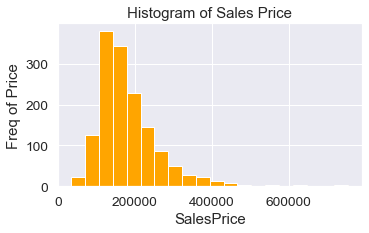

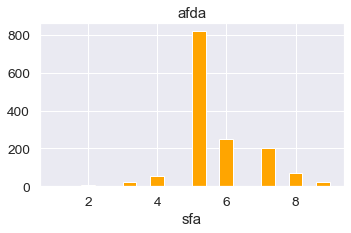

In [0]:
def hist_plot(x, title, xlabel, ylabel):
    plt.figure(figsize=(12,3))
    plt.subplot(121)
    plt.hist(x, bins= 20, color ='orange')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    
    
cols = df.drop('Id', axis= 1).columns.values
print(cols)
hist_plot(df.SalePrice, 'Histogram of Sales Price', 'SalesPrice', 'Freq of Price')
hist_plot(df.OverallCond, 'afda','sfa','')

In [0]:
df.loc[:, np.sum(df.isnull())>0].isna().sum()

Series([], dtype: float64)

In [0]:
df[['YearBuilt']]//10

,YearBuilt
0,200
1,197
2,200
3,191
4,200
...,...
1455,199
1456,197
1457,194
1458,195
